# Sonu Giri
# Batch 6
# Assignment 3A

Achieve 99.22 accuracy without using fully-connected layer( aka Dense Layer) with parameters less than 18000.

Result: We achieved 99.22 accuracy with ~16000 parameters

# **Import Libraries and modules**

In [0]:
# https://keras.io/

!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,  BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28) [5 0 4 ... 5 6 8] (10000, 28, 28) [7 2 1 ... 4 5 6]


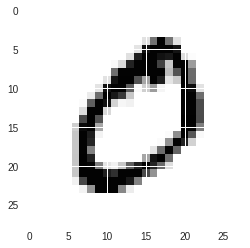

In [0]:
print (X_train.shape, y_train, X_test.shape, y_test)

from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 7, 7, activation='relu' ))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 10)          1450      
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 1, 1, 10)          4910      
__________

In [0]:
# Save the checkpoint in the /output folder
filepath = "3A_Sonu_best_only.hdf5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1,
          validation_data=(X_test, Y_test),
          callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.3178 - acc: 0.9014 - val_loss: 0.0869 - val_acc: 0.9753

Epoch 00001: val_acc improved from -inf to 0.97530, saving model to 3A_Sonu_best_only.hdf5
Epoch 2/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0728 - acc: 0.9781 - val_loss: 0.0637 - val_acc: 0.9808

Epoch 00002: val_acc improved from 0.97530 to 0.98080, saving model to 3A_Sonu_best_only.hdf5
Epoch 3/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.0528 - acc: 0.9847 - val_loss: 0.0442 - val_acc: 0.9865

Epoch 00003: val_acc improved from 0.98080 to 0.98650, saving model to 3A_Sonu_best_only.hdf5
Epoch 4/20
60000/60000 [==============================] - 21s 346us/step - loss: 0.0428 - acc: 0.9872 - val_loss: 0.0360 - val_acc: 0.9876

Epoch 00004: val_acc improved from 0.98650 to 0.98760, saving model to 3A_Sonu_best_only.hdf5
Epoch 5/20
60000/

In [0]:
model.load_weights(filepath)
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031235827127792437
Test accuracy: 0.9922


In [0]:
y_pred = model.predict(X_test)

In [0]:
# Save the trained weights in to .h5 format
model.save_weights(filepath)
print("Saved model to disk")

Saved model to disk
